<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

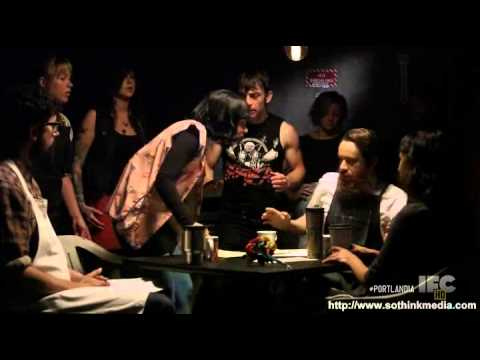

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'/home/jepoy/Documents/Projects/github/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [23]:
import pandas as pd

#url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"
file_path = "./data/yelp_coffeeshop_review_data.csv"
shops = pd.read_csv(file_path)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [24]:
# Start here 
# we are going to work on the 'star_rating'
import re


In [25]:
def tokenize_num(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^0-9 .]', '', text)
    
    return float(tokens)

In [26]:
type(shops['star_rating'][0])

str

In [27]:
shops['star_nums'] = shops['star_rating'].apply(tokenize_num)
type(shops['star_nums'][0])

numpy.float64

In [28]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,star_nums
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0


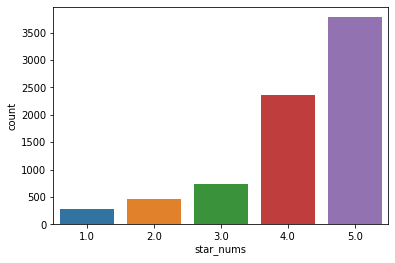

In [29]:
import seaborn as sns

sns.countplot(shops['star_nums']);

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [30]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [31]:
# Tokenize text to remove non-alphanumeric characters
def tokenize(text):
    tokens = re.sub('[^a-zA-Z ]', '', text)
    tokens = tokens.lower().split()    
    return tokens

In [32]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [33]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[checkin, love, love, loved, the, atmosphere, ..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[listed, in, date, night, austin, ambiance, in..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[very, cool, decor, good, drinks, nice, seatin..."
4,12/3/2016 1 check-in They are located within ...,"[checkin, they, are, located, within, the, nor..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[checkin, very, cute, cafe, i, think, from, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[checkins, listed, in, nuptial, coffee, bliss,..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[checkins, love, this, place, stars, for, clea..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[checkin, ok, lets, try, this, approach, pros,..."
9,11/10/2016 3 check-ins This place has been sh...,"[checkins, this, place, has, been, shown, on, ..."


In [34]:
# Analyze Tokens
# To take the overall word/token count:

# Import Counter
from collections import Counter

# Instantiate Counter
counts = Counter()

# Apply instantiated counter to tokens column
shops['tokens'].apply(lambda x: counts.update(x))

# Check 10 most common words in the token column
counts.most_common(10)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546)]

In [36]:
# Let's filter out stop words

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [40]:
# Added at 7:09
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens_stopwords'] = tokens

In [41]:
# Let's create a fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')


In [42]:
# Use the Function
wc = count(shops['tokens_stopwords'])

In [43]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,,7616,22606,1.0,0.053592,0.053592,1.000000
42,coffee,4210,8058,2.0,0.019103,0.072695,0.552784
162,place,3029,4264,3.0,0.010109,0.082803,0.397715
117,great,2438,3250,4.0,0.007705,0.090508,0.320116
260,it's,2061,3117,5.0,0.007389,0.097897,0.270614


<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

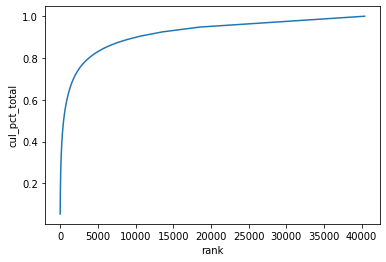

In [44]:
import seaborn as sns
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

In [45]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()
# top 100 words account for 54.3% of all the words

0.2954798148020834

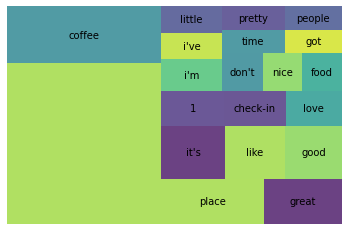

In [46]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [ ]:
# already stop words with spacey 
## Game plan clear lemmetiz? 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

